# Other Categorical Plots

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv('../Datasets/titanic.csv')

In [7]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


## Correlation Plots

Text(0.5, 1, 'Heatmap for categorical variables in Titanic Dataset')

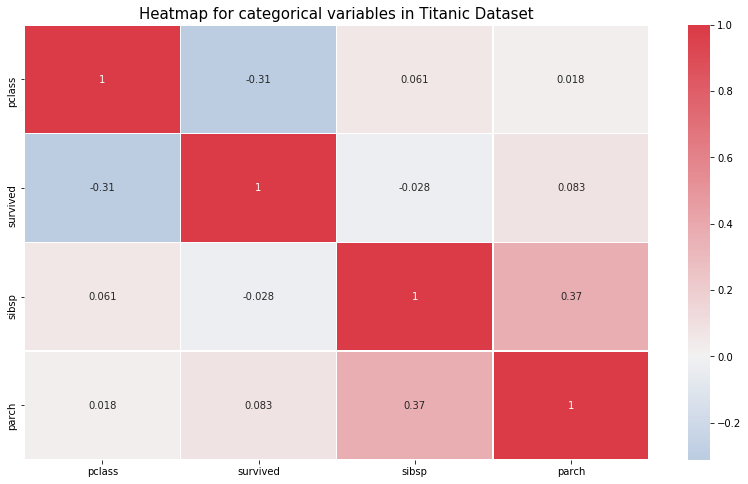

In [15]:
plt.figure(figsize= (14,8))
# cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
cmap = sns.diverging_palette(250, 10, as_cmap=True)
ax = sns.heatmap(df.corr(),center = 0,annot= True,linewidth=0.5,cmap= cmap)
plt.title('Heatmap for categorical variables in Titanic Dataset', size=15)

### Symmetric Matrix - hence only showing the lower half

Text(0.5, 1, 'Heatmap for categorical variables in Titanic Dataset - Partial Matrix')

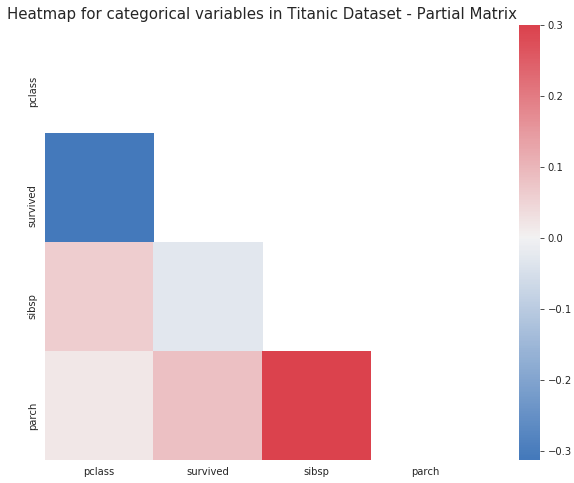

In [14]:
corr = df.corr()
plt.figure(figsize=(14,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,cmap=cmap,center = 0)
plt.title('Heatmap for categorical variables in Titanic Dataset - Partial Matrix', size=15)

## Barplots for each Categorical Column 

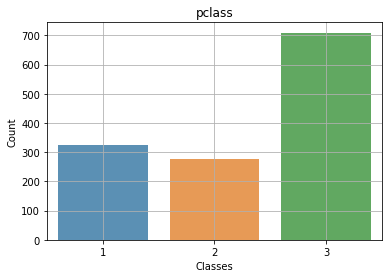

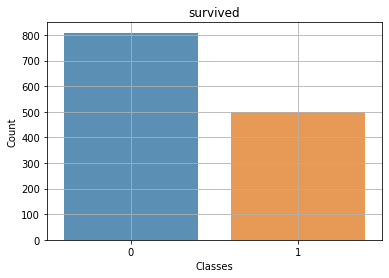

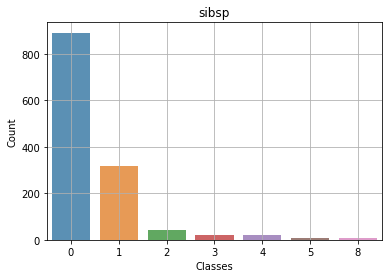

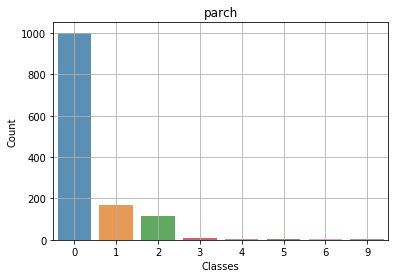

In [30]:
survived_columns = ['pclass', 'survived', 'sibsp', 'parch']
for col in survived_columns:
    val = df[col].value_counts(dropna=False)
    if(len(val.index)>100):
        print("Too many Categories in "+col)
        continue
    #plt.figure(figsize=(7,7))
    sns.barplot(x=val.index,y=val.values,label=True, alpha=0.8)
    plt.title(col)
    plt.ylabel('Count')
    plt.xlabel("Classes")
    plt.grid('True')
    plt.show()

## Circle Charts - Boolean Columns

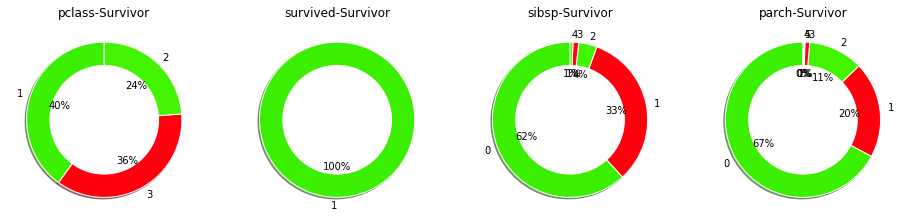

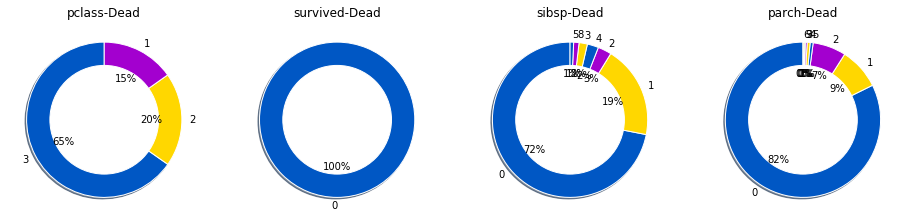

In [42]:
import itertools
default = df[df["survived"]==1]
non_default = df[df["survived"]==0]

d_cols =['pclass', 'survived', 'sibsp', 'parch']
d_length = len(d_cols)

fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism"),startangle = 90,
                                        wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Survivor")


fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    non_default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",3),startangle = 90,
                                           wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Dead")

In [43]:
categorical_columns = ['pclass', 'survived', 'sibsp', 'parch']
target = "survived"

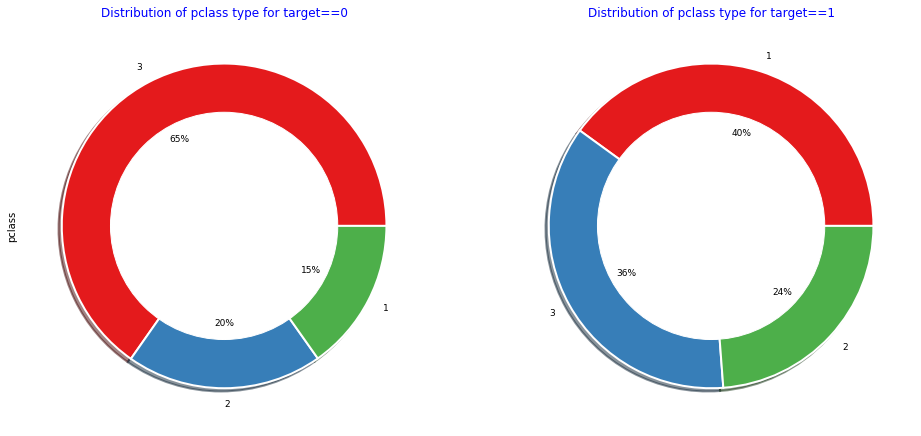

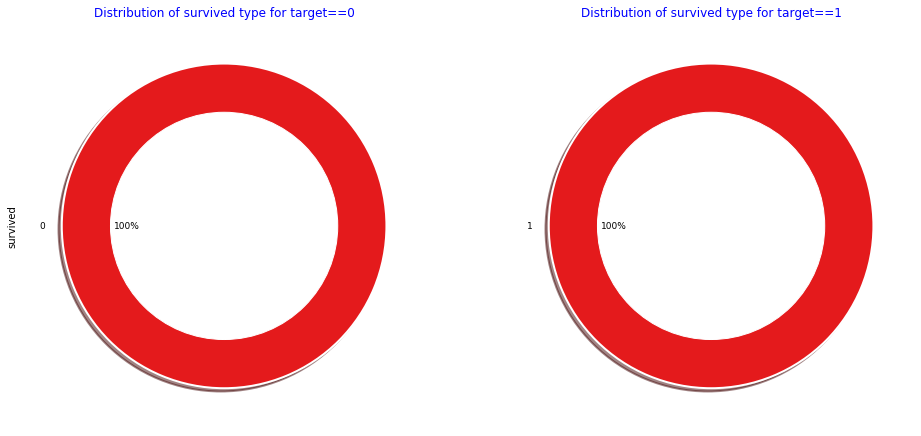

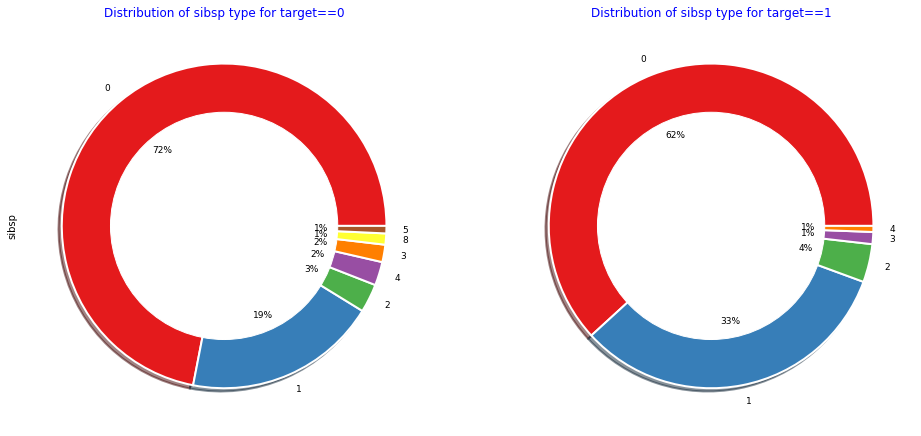

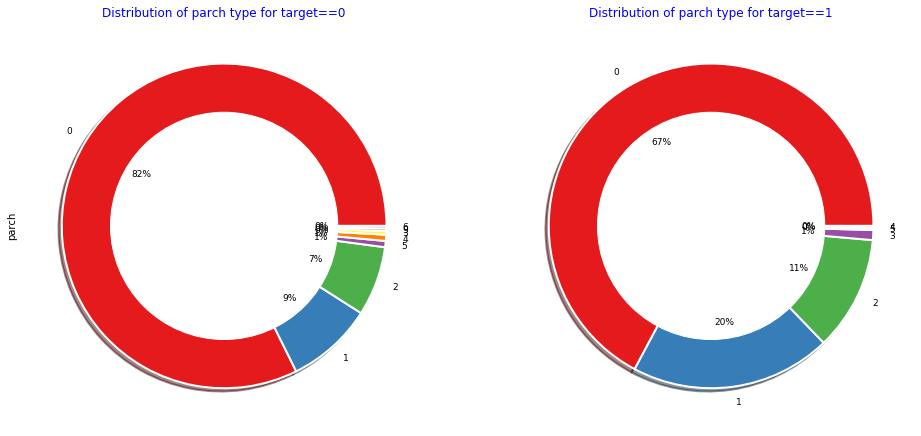

In [44]:

for col in categorical_columns:
	plt.figure(figsize=(16,8))
	plt.subplot(121)
	df[df[target]==0][col].value_counts().plot.pie(fontsize=9,autopct = "%1.0f%%",colors = sns.color_palette("Set1"),
	wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
	circ = plt.Circle((0,0),.7,color="white")
	plt.gca().add_artist(circ)
	plt.title("Distribution of "+col+" type for target==0",color="b")

	plt.subplot(122)
	df[df[target]==1][col].value_counts().plot.pie(fontsize=9,autopct = "%1.0f%%", colors = sns.color_palette("Set1"),
	wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
	circ = plt.Circle((0,0),.7,color="white")
	plt.gca().add_artist(circ)
	plt.title("Distribution of "+col+" type for target==1",color="b")
	plt.ylabel("")
	plt.show()